## Fuzzy Inference System

<img src="images/image-1.png"/>

<img src="images/image-2.png"/>

<img src="images/image-3.png"/>

<img src="images/image-4.png"/>

<img src="images/image-5.png"/>

In [14]:
class Fuzzy():

    def __init__(self):
        self.max = 0
        self.min = 0

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, value):
        return self.max - value * (self.max - self.min)

    def rev_up(self, value):
        return value * (self.max - self.min) + self.min
# Down
# value = (max - x) / (max - min)
# value * (max - min) = max -x
# value * (max - min) - max = -x
# -x = value * (max - min) - max 
# x = max - value * (max - min)

# Up
# value = (x - min) / (max - min)
# value * (max - min) = x - min
# value * (max - min) + min = x
# x = value * (max - min) + min

In [15]:
# Permintaan
# Turun(down) min = 1000 max = 5000
# Naik (up) min = 1000 max = 5000
# x = 4000

fis = Fuzzy()

fis.min = 1000
fis.max = 5000

turun = fis.down(4000)
print(f"Nilai fuzzy variable permintaan himpunan turun adalah: {turun}")

naik = fis.up(4000)
print(f"Nilai fuzzy variable permintaan himpunan naik adalah: {naik}")

Nilai fuzzy variable permintaan himpunan turun adalah: 0.25
Nilai fuzzy variable permintaan himpunan naik adalah: 0.75


In [16]:
# Persediaan
# Sedikit(down) min = 100 max = 600
# Banyak (up) min = 100 max = 600
# x = 300

fis.min = 100
fis.max = 600

sedikit = fis.down(300)
print(f"Nilai fuzzy variable Persediaan himpunan sedikit adalah: {sedikit}")

banyak = fis.up(300)
print(f"Nilai fuzzy variable Persediaan himpunan banyak adalah: {banyak}")


Nilai fuzzy variable Persediaan himpunan sedikit adalah: 0.6
Nilai fuzzy variable Persediaan himpunan banyak adalah: 0.4


In [17]:
# produksi
fis = Fuzzy()
fis.min = 2000
fis.max = 7000

berkurang = fis.rev_down(0.25)
print(f"Nilai riil variable Produksi himpunan berkurang adalah: {berkurang}")

bertambah = fis.rev_up(0.6)
print(f"Nilai riil variable Produksi himpunan bertambah adalah: {bertambah}")

Nilai riil variable Produksi himpunan berkurang adalah: 5750.0
Nilai riil variable Produksi himpunan bertambah adalah: 5000.0


In [18]:
# Permintaan = Demand
#     turun = decrease
#     naik = increase
# Persediaan = Stock
#     sedikit = a_few
#     banyak = a_lot
# Produksi = Production
#     berkurang = reduce
#     bertambah = add

class Demand(Fuzzy):

    def __init__(self):
        self.min = 1000
        self.max = 5000

    def decrease(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def increase(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)

class Stock(Fuzzy):

    def __init__(self):
        self.min = 100
        self.max = 600

    def a_few(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def a_lot(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)
    

class Production(Fuzzy):

    def __init__(self):
        self.min = 2000
        self.max = 7000
    
    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

In [19]:
pmt = Demand()
x = 9000
pmt.decrease(x)


0

In [20]:
prod = Production()
fuzzy_value = 0.6
prod.add(fuzzy_value)

5000.0

In [21]:
rule_map = {
    ("decrease", "a_lot"): "reduce",
    ("decrease", "a_few"): "reduce",
    ("increase", "a_lot"): "add",
    ("increase", "a_few"): "add"
}

In [22]:
fuzzy_real = 0
fuzzy = 0

for k, v in rule_map.items():
    # print(f"{k[0]=} {k[1]=}")
    # print(f"{v=}")
    demand = Demand()
    stock = Stock()
    prod = Production()
    
    x_demand = 4000
    x_stock = 300

    demand_value = demand.decrease(x_demand) if k[0] == "decrease" else demand.increase(x_demand)
    stock_value = stock.a_few(x_stock) if k[1] == "a_few" else stock.a_lot(x_stock)

    prod_value = min(demand_value, stock_value)

    x_prod = prod.reduce(prod_value) if v == "reduce" else prod.add(prod_value)
    
    fuzzy_real += prod_value * x_prod
    fuzzy += prod_value

result = int(fuzzy_real / fuzzy)
result
print(f"Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak {result} kemasan.")

Jadi, jumlah makanan jenis ABC yang harus diproduksi sebanyak 4983 kemasan.


## Tugas Latihan
- Buat gambar grafik di bawah dengan menggunakan hasil perhitungan dari code yang sudah dibuat sebelumnya

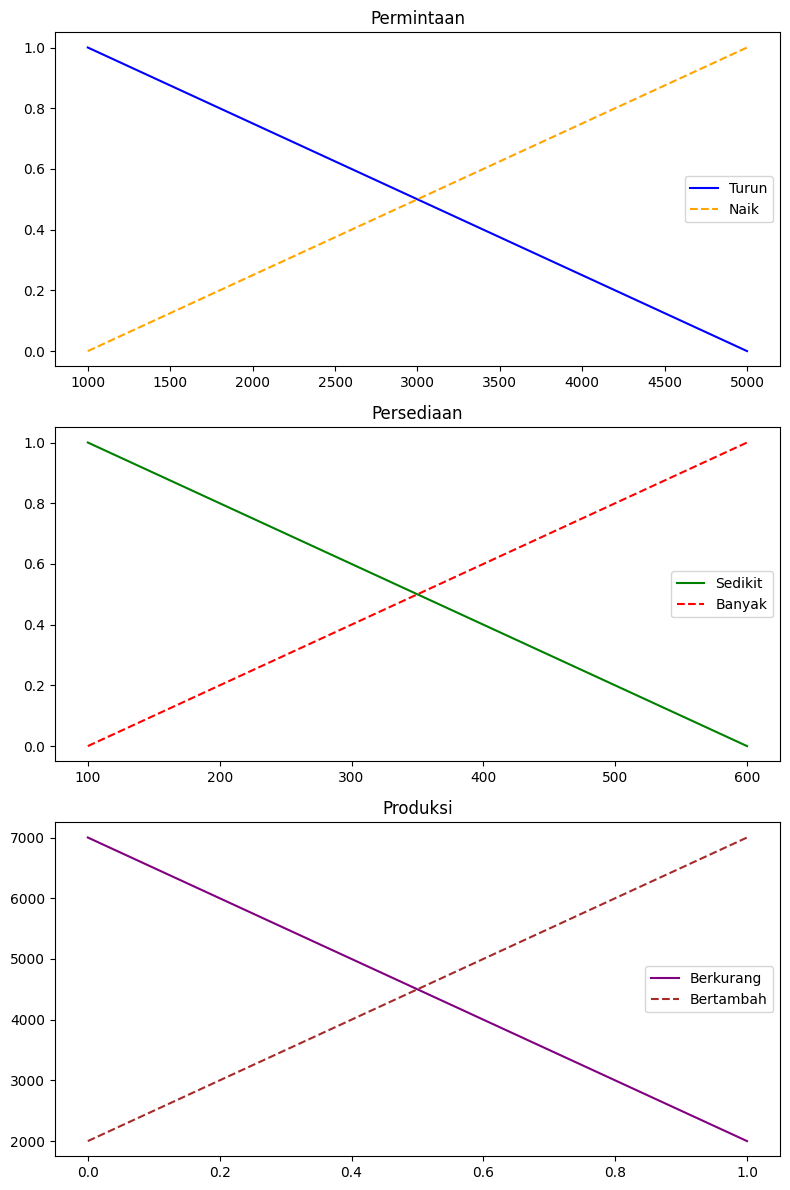

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data Permintaan
x_demand = np.linspace(1000, 5000, 100)
demand = Demand()
demand_down = [demand.decrease(x) for x in x_demand]
demand_up = [demand.increase(x) for x in x_demand]

# Data Persediaan
x_stock = np.linspace(100, 600, 100)
stock = Stock()
stock_few = [stock.a_few(x) for x in x_stock]
stock_lot = [stock.a_lot(x) for x in x_stock]

# Data Produksi
x_prod = np.linspace(2000, 7000, 100)
production = Production()
production_down = [production.reduce(v) for v in np.linspace(0, 1, 100)]
production_up = [production.add(v) for v in np.linspace(0, 1, 100)]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Permintaan
axs[0].plot(x_demand, demand_down, label='Turun', color='blue')
axs[0].plot(x_demand, demand_up, label='Naik', color='orange', linestyle='dashed')
axs[0].set_title('Permintaan')
axs[0].legend()

# Persediaan
axs[1].plot(x_stock, stock_few, label='Sedikit', color='green')
axs[1].plot(x_stock, stock_lot, label='Banyak', color='red', linestyle='dashed')
axs[1].set_title('Persediaan')
axs[1].legend()

# Produksi
axs[2].plot(np.linspace(0, 1, 100), production_down, label='Berkurang', color='purple')
axs[2].plot(np.linspace(0, 1, 100), production_up, label='Bertambah', color='brown', linestyle='dashed')
axs[2].set_title('Produksi')
axs[2].legend()

plt.tight_layout()
plt.show()